Gift Wrapping Algorithm

First we need to find the leftmost point:

In [1]:
def leftmost(points):
    minim = 0
    for i in range(1,len(points)):
        if points[i][0] < points[minim][0]:
            minim = i
        elif points[i][0] == points[minim][0]:
            if points[i][1] > points[minim][1]:
                minim = i
    return minim

Then, starting from the leftmost point, until reaching it again, we need to find the point with the lowest angle. Since this point is a vertex of the convex hull, it verifies the property that all other points lie to the left of the directed line (previousVertex(p) -> thisPoint). Hence all we need to do to is look for the point q such that the triplet (p, q, r) is counterclockwise for any other point r.

We first define a helper function that checks whether a triplet is counterclockwise or not:

In [2]:
def det(p1, p2, p3):
    """ 
    > 0: CCW turn
    < 0 CW turn
    = 0: colinear
    """
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) -(p2[1] - p1[1]) * (p3[0] - p1[0])

In [3]:
from matplotlib import pyplot as plt #for plotting
from random import randint #for creating data points

def create_points(ct, min = 0, max = 50):
    return [[randint(min, max), randint(min, max)]\
        for _ in range(ct)] 

def scatter_plot(coords, convex_hull = None):
    xs, ys = zip(*coords) #unzip into x and y coordinates
    plt.scatter(xs, ys)

    if convex_hull:
        for i in range(1, len(convex_hull) + 1):
            if i == len(convex_hull): i = 0 #wrap
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0], c1[0]), (c0[1], c1[1]), 'r')
    plt.show()


In [4]:
points = create_points(10)
hull = []
l = leftmost(points)
leftMost = points[l]
currentVertex = leftMost
hull.append(currentVertex)
nextVertex = points[1]
index = 2
nextIndex = -1
while True:
    c0 = currentVertex
    c1 = nextVertex

    checking = points[index]
    c2 = checking

    crossProduct = det(currentVertex, nextVertex, checking)
    if crossProduct < 0:
        nextVertex = checking
        nextIndex = index
    index += 1
    if index == len(points):
        if nextVertex == leftMost:
            break
        index = 0
        hull.append(nextVertex)
        currentVertex = nextVertex
        nextVertex = leftMost

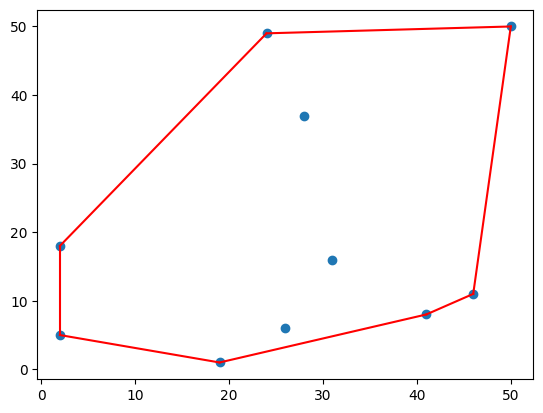

In [5]:
scatter_plot(points, hull)